In [1]:
import os
import spacy
from spacy import displacy
from collections import defaultdict



In [3]:
# download medium size model

# need to download via. cmd in env first

#python -m spacy download en_core_web_lg

nlp= spacy.load('en_core_web_md') # stores vectors vectors, numerical representation of a token




In [4]:
# review pipeline

nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

We will be working with texts from Gutenberg  - still have elements of raw unstructured data. Long sequence of text without clear structure. Note it's always good to have students work on data that needs to be cleaned.
We will spend most of lesson cleaning the data.
We want to know when characters enter and leave in Alice in Wonderland. And how frequently they appear
Want to identify all potential characters: will have mistakes - false positive, false negatives. 

In [7]:
# lets open the document. Raw text, should clean first.

with open('alice.txt', 'r', encoding='utf-8') as f:  
    text = f.read()
print(text[:500])

The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located


In [11]:
# Avoid header. We want to process text with set of actions. We want to remove everything before chapter 1.
#split after CHAPTER XII. Alice's Evidence, first occurrence. [1] will be the body of the text. Strip to remove whitespace

body = text.split("CHAPTER XII.   Alice’s Evidence", 1)[1].strip()
print(body[:500])

CHAPTER I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversations?”

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure of
making a daisy-chain 


In [12]:
# note that we also have footers

print(body[-500:])

 by copyright in
the U.S. unless a copyright notice is included. Thus, we do not
necessarily keep eBooks in compliance with any particular paper
edition.

Most people start at our website which has the main PG search
facility: www.gutenberg.org

This website includes information about Project Gutenberg-tm,
including how to make donations to the Project Gutenberg Literary
Archive Foundation, how to help produce our new eBooks, and how to
subscribe to our email newsletter to hear about new eBooks.


In [13]:
# split to remove footer

body = body.split("***END OF THE PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND***")[0].strip() #[0] grabs main body that comes before this point. split cleans trailing and leading whitespace. [1] starts the footer

In [15]:
# we want to structure the data - right now it's just one long string. Data should be relational. 
# Chapters are good structures for analyzing structures. Note paragraphs are distinguished by double line breaks. We could separate other ways depending on our needs.
# this produces a list (named tuple). Could save it as a file. 

chapters = body.split('CHAPTER ')[1:] # note recall python is case sensitive, [1:] grab first index and then everything else. 'chapter 1' indexed at 1

len(chapters) # there are twelve

print(chapters[0][:500]) # print first chapter

I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversations?”

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure of
making a daisy-chain would be


In [17]:
# start to identify people

people = []

for i, chapter in enumerate(chapters, 1): # start with 1, there is no chapter 0
    doc = nlp(chapter) # doc container for each chapter, keeping data structure
    for ent in doc.ents:
        if ent.label_ == 'person': # isolate using condition
            people.append(ent.text)

people = list(set(people)) # convert list to set and back to list. Removes duplicates
print(len(people)) # note I pick up 54. The class picks up 46 people.
print(people)


54
['Shakespeare', 'Hatter', 'Queen', 'Derision', 'Lobster', 'Lacie', 'Panther', 'Mabel', 'Project Gutenberg-tm\nelectronic works', 'Tillie', 'Said', 'Edgar', 'Dinah', '1.F.6', 'Project Gutenberg-tm', 'Cheshire Puss', 'Hjckrrh', 'Dinn', 'Project Gutenberg', 'Miss', 'I.\nDown the Rabbit-Hole', 'Ma', 'William_', 'Project Gutenberg-tm eBooks', 'Alice', 'Gryphon', 'Lobster Quadrille', 'Hare', 'William', 'Mouse', 'Ada', 'Mary Ann', 'Alice\n', 'Pennyworth', 'William the Conqueror', 'Soo', 'Dormouse', 'William\nthe Conqueror', 'Pigeon', 'Cheshire', 'Elsie', 'Shark', 'Tortoise', 'Michael S. Hart', 'Bill', 'Turtle Soup_', "Project Gutenberg-tm's", 'Jack', 'AGREE', 'Pat', 'Longitude', 'Eaglet', 'Edwin', 'Brandy']


In [18]:


person_mention_positions = {}

for chapter_number, chapter_text in enumerate(chapters, 1): # use enumerate to count where we are in the loop

    processed_chapter = nlp(chapter_text)

    for entity in processed_chapter.ents:

        if entity.label_ == "person" and "." not in entity.text: # ignore text that has .

            if entity.text.strip() not in person_mention_positions: 

                person_mention_positions[entity.text] = {} # add to dict, value will be another dict

            if chapter_number not in person_mention_positions[entity.text.strip()]:
                
                person_mention_positions[entity.text.strip()][chapter_number] = []

            person_mention_positions[entity.text.strip()][chapter_number].append((entity.start_char, entity.end_char)) # append every time a character appears




In [ ]:
# More pythonic way to write all of this

person_mention_positions = defaultdict(lambda: defaultdict(list))
for chapter_number, chapter_text in enumerate(chapters, 1):
    processed_chapter = nlp(chapter_text)
    for entity in processed_chapter.ents:
        if entity.label_ == 'person':
            person_mention_positions[entity.text][chapter_number].append((entity.start_char, entity.end_char))

In [19]:
# Analyse our output

person_mention_positions.keys()

dict_keys(['Alice', 'Longitude', 'Dinah', 'Ada', 'Mabel', 'Mouse', 'William the Conqueror', 'William\nthe Conqueror', 'Edwin', 'Edgar', 'William', 'Eaglet', 'Shakespeare', 'Ma', 'Mary Ann', 'Pat', 'Bill', 'Brandy', 'Jack', 'William_', 'Pigeon', 'Cheshire', 'Queen', 'Cheshire Puss', 'Hatter', 'Hare', 'Dormouse', 'Elsie', 'Lacie', 'Tillie', 'Miss', 'Hjckrrh', 'Tortoise', 'Gryphon', 'Derision', 'Lobster Quadrille', 'Said', 'Dinn', 'Lobster', 'Shark', 'Panther', 'Turtle Soup_', 'Soo', 'Pennyworth', 'Project Gutenberg', 'Project Gutenberg-tm', 'Project Gutenberg-tm\nelectronic works', 'AGREE', "Project Gutenberg-tm's", 'Project Gutenberg-tm eBooks'])

In [24]:
print(person_mention_positions['William']) # produces dict with 2 keys. These are ints that correspond to chapters. Can see what parts of chapter the character appears

print(person_mention_positions['William'][3]) # isolate chapter 3

{3: [(2249, 2256), (2282, 2289)], 5: [(2868, 2875), (3052, 3059)]}
[(2249, 2256), (2282, 2289)]


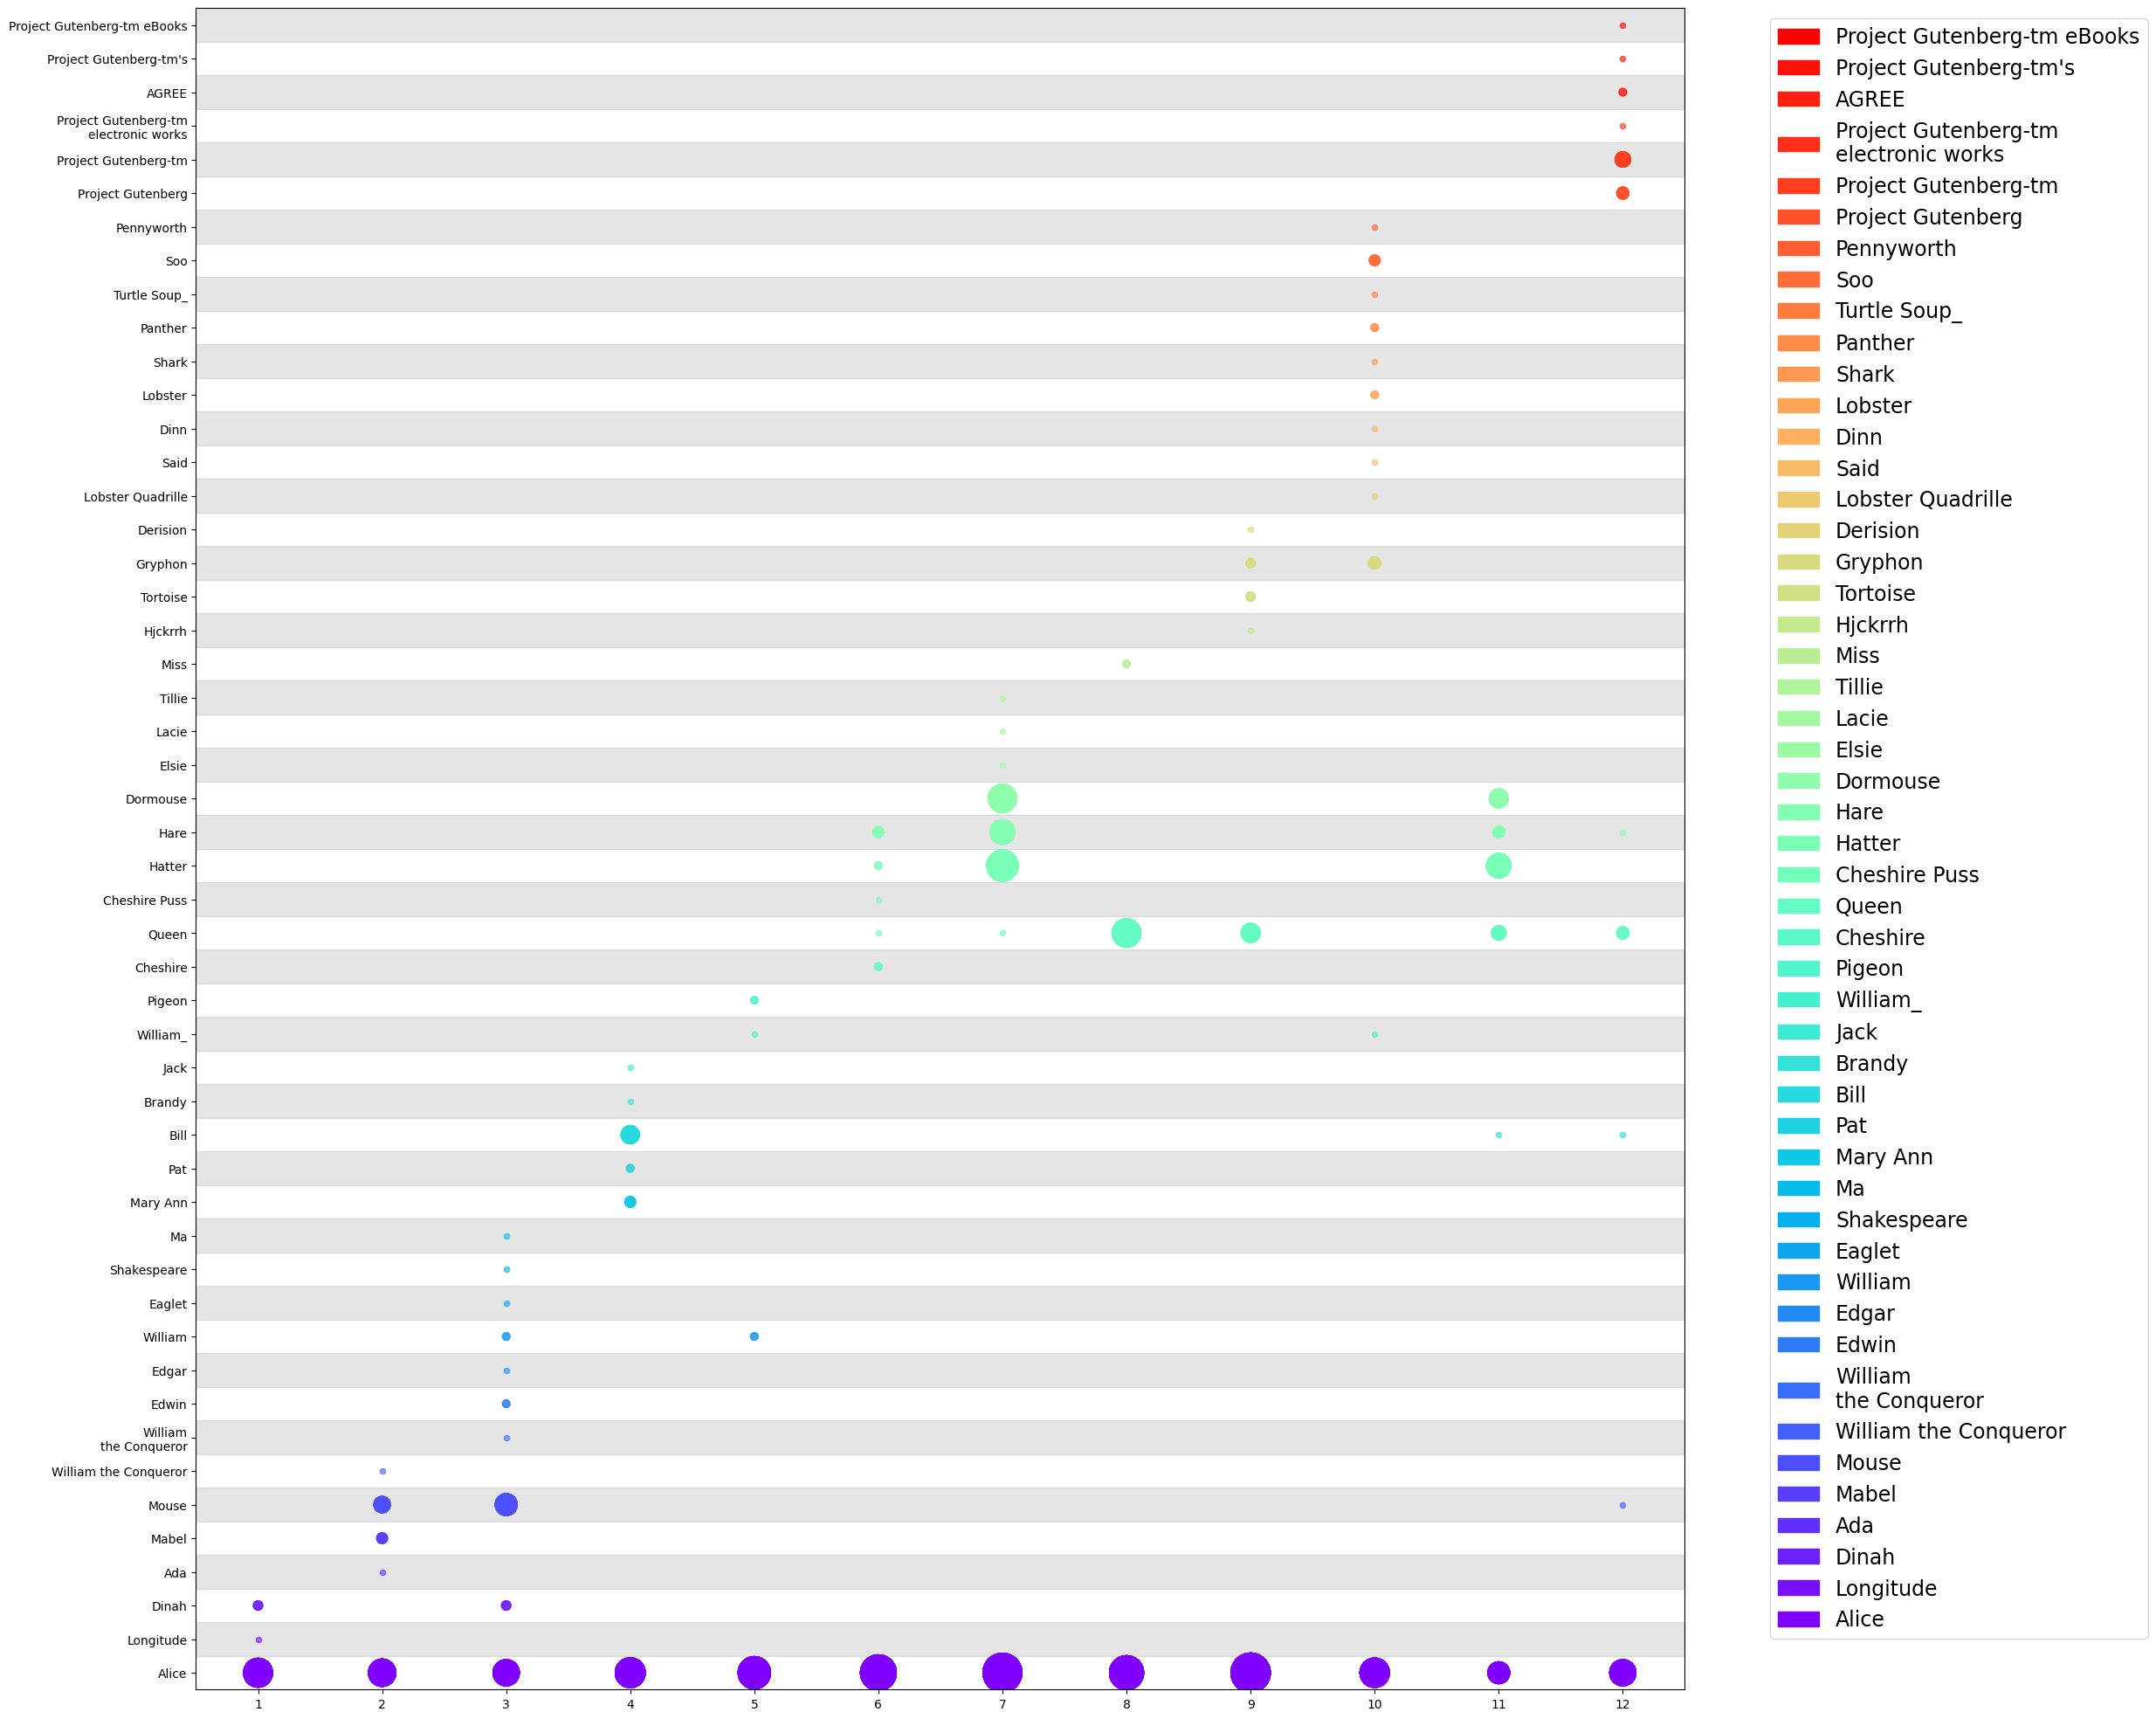

In [25]:
# Now we can visualize our data. Review and analyze this 



import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Define the figure size
fig, ax = plt.subplots(figsize=(22, 25))

# Set the global font size
plt.rcParams.update({'font.size': 17})

# Get a list of unique entities and create a color for each entity
entities = list(person_mention_positions.keys())
num_entities = len(entities)
colors = plt.cm.rainbow(np.linspace(0, 1, num_entities))

# Create a numeric representation of the chapters
c = {i: i for i in range(1, 13)}  # assuming chapters numbered from 1 to 12


# Add alternating background colors
for i in range(1, num_entities+1):
    if i % 2 == 0:
        ax.fill_betweenx(y=[i-0.5, i+0.5], x1=0.5, x2=max(c.values())+0.5, color='gray', alpha=0.2)

# For holding patches for creating custom legend
patches = []

for color, (entity, entity_chapters) in zip(colors, person_mention_positions.items()):
    for chapter, positions in entity_chapters.items():
        y = [entities.index(entity)+1] * len(positions) # start y-axis at 1
        x = [c[chapter]] * len(positions)
        size = [20 * len(positions) for _ in positions]
        ax.scatter(x, y, s=size, color=color, alpha=0.6)
    
    # Create patch for each entity
    patches.append(mpatches.Patch(color=color, label=entity))

# Set the y-ticks and y-ticklabels to the entity names
ax.set_yticks(range(1, num_entities+1))
ax.set_yticklabels(entities)

# Set the x-ticks and x-ticklabels to the chapter numbers
ax.set_xticks(range(1, max(c.values())+1))
ax.set_xticklabels(range(1, max(c.values())+1))

# Set the x-limits and y-limits of the plot
ax.set_xlim([0.5, max(c.values())+0.5]) # start x-axis at 1
ax.set_ylim([0.5, num_entities+0.5]) # start y-axis at 1

# Add custom legend outside the plot at the right side
plt.legend(handles=patches[::-1], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



Think about how we could track geographic areas instead of people. Could use GPE.

IF using something like Lord of the Ring, would want to use a transformer model. Imaginary locations are out of scope for normal GPE. Or train a model to recognize these GPE's

In [26]:
place_mention_positions = {}

for chapter_number, chapter_text in enumerate(chapters, 1): # use enumerate to count where we are in the loop

    processed_chapter = nlp(chapter_text)

    for entity in processed_chapter.ents:

        if entity.label_ == "GPE" and "." not in entity.text: # ignore text that has . To see all instance 'entity.label- in ['GPE', 'LOC]', appear as GPE or as LOC
            if entity.text.strip() not in place_mention_positions: 

                place_mention_positions[entity.text] = {} # add to dict, value will be another dict

            if chapter_number not in place_mention_positions[entity.text.strip()]:
                
                place_mention_positions[entity.text.strip()][chapter_number] = []

            place_mention_positions[entity.text.strip()][chapter_number].append((entity.start_char, entity.end_char)) # append every time a character appears


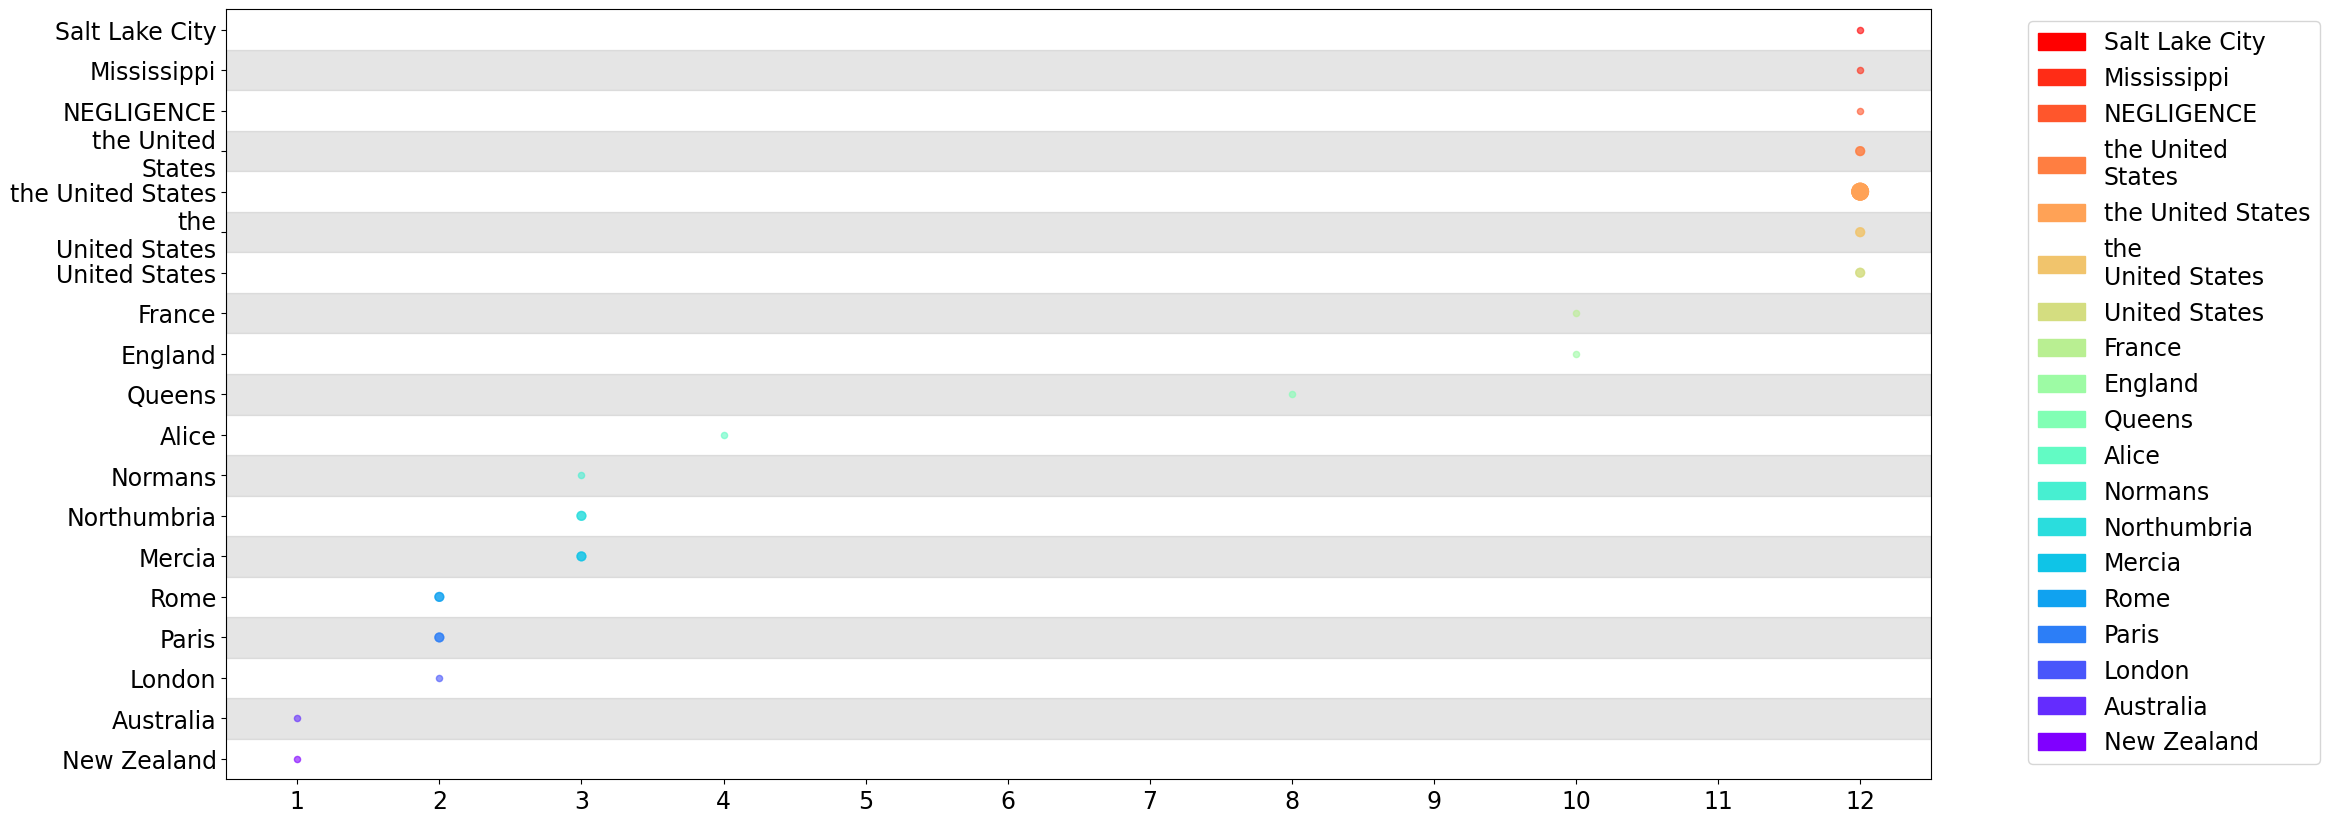

In [29]:
# Define the figure size
fig, ax = plt.subplots(figsize=(22, 10))

# Set the global font size
plt.rcParams.update({'font.size': 17})

# Get a list of unique entities and create a color for each entity
entities = list(place_mention_positions.keys())
num_entities = len(entities)
colors = plt.cm.rainbow(np.linspace(0, 1, num_entities))

# Create a numeric representation of the chapters
c = {i: i for i in range(1, 13)}  # assuming chapters numbered from 1 to 12


# Add alternating background colors
for i in range(1, num_entities+1):
    if i % 2 == 0:
        ax.fill_betweenx(y=[i-0.5, i+0.5], x1=0.5, x2=max(c.values())+0.5, color='gray', alpha=0.2)

# For holding patches for creating custom legend
patches = []

for color, (entity, entity_chapters) in zip(colors, place_mention_positions.items()):
    for chapter, positions in entity_chapters.items():
        y = [entities.index(entity)+1] * len(positions) # start y-axis at 1
        x = [c[chapter]] * len(positions)
        size = [20 * len(positions) for _ in positions]
        ax.scatter(x, y, s=size, color=color, alpha=0.6)
    
    # Create patch for each entity
    patches.append(mpatches.Patch(color=color, label=entity))

# Set the y-ticks and y-ticklabels to the entity names
ax.set_yticks(range(1, num_entities+1))
ax.set_yticklabels(entities)

# Set the x-ticks and x-ticklabels to the chapter numbers
ax.set_xticks(range(1, max(c.values())+1))
ax.set_xticklabels(range(1, max(c.values())+1))

# Set the x-limits and y-limits of the plot
ax.set_xlim([0.5, max(c.values())+0.5]) # start x-axis at 1
ax.set_ylim([0.5, num_entities+0.5]) # start y-axis at 1

# Add custom legend outside the plot at the right side
plt.legend(handles=patches[::-1], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
